In [ ]:
# To do:
# create markdown sections (including fMRIPrep website, nilearn website etc.) and put references
# improve comments
# Different pipelines have different n of participants - remove extra participants:
    # exclude M006, M107, M108
# do a t-test/Wilcoxon Signed Rank Test to check whether the differences between pipelines are significant

In [ ]:
# This script is to be used on pre-processed fMRI timeseries data 

In [12]:
import nibabel as nib
import glob

In [15]:
# load the fMRI timeseries for all participants [single pipeline]
# and check image dimensions for a single participant 

# change this line to get your data!
fmri_img = glob.glob("/Users/mishodimitrov/Downloads/FourEcho_AFNI/*.gz")
#fmri_img = glob.glob("/Volumes/Seagate Dr/PhD/Chapter 1/FourEcho_AFNI/*.gz")
print(fmri_img)
fmri_img_single = nib.load(fmri_img[0])
print(fmri_img_single.shape)


['/Users/mishodimitrov/Downloads/FourEcho_AFNI/M007A_f_e1234_medn_nlw.nii.gz', '/Users/mishodimitrov/Downloads/FourEcho_AFNI/M111B_f_e1234_medn_nlw.nii.gz', '/Users/mishodimitrov/Downloads/FourEcho_AFNI/M110A_f_e1234_medn_nlw.nii.gz', '/Users/mishodimitrov/Downloads/FourEcho_AFNI/M114A_f_e1234_medn_nlw.nii.gz', '/Users/mishodimitrov/Downloads/FourEcho_AFNI/M016C_f_e1234_medn_nlw.nii.gz', '/Users/mishodimitrov/Downloads/FourEcho_AFNI/M010A_f_e1234_medn_nlw.nii.gz', '/Users/mishodimitrov/Downloads/FourEcho_AFNI/M014A_f_e1234_medn_nlw.nii.gz', '/Users/mishodimitrov/Downloads/FourEcho_AFNI/M109C_f_e1234_medn_nlw.nii.gz', '/Users/mishodimitrov/Downloads/FourEcho_AFNI/M113A_f_e1234_medn_nlw.nii.gz', '/Users/mishodimitrov/Downloads/FourEcho_AFNI/M013B_f_e1234_medn_nlw.nii.gz', '/Users/mishodimitrov/Downloads/FourEcho_AFNI/M115C_f_e1234_medn_nlw.nii.gz', '/Users/mishodimitrov/Downloads/FourEcho_AFNI/M020B_f_e1234_medn_nlw.nii.gz', '/Users/mishodimitrov/Downloads/FourEcho_AFNI/M005B_f_e1234_med


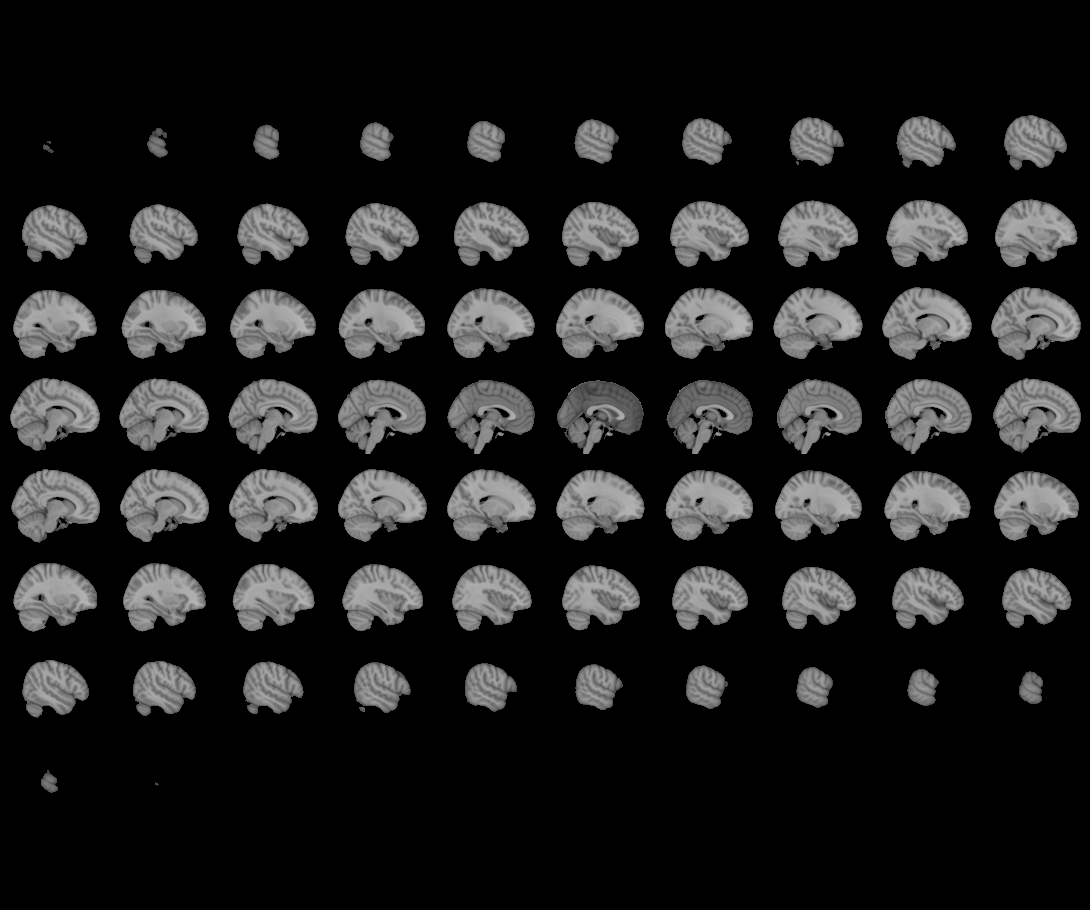
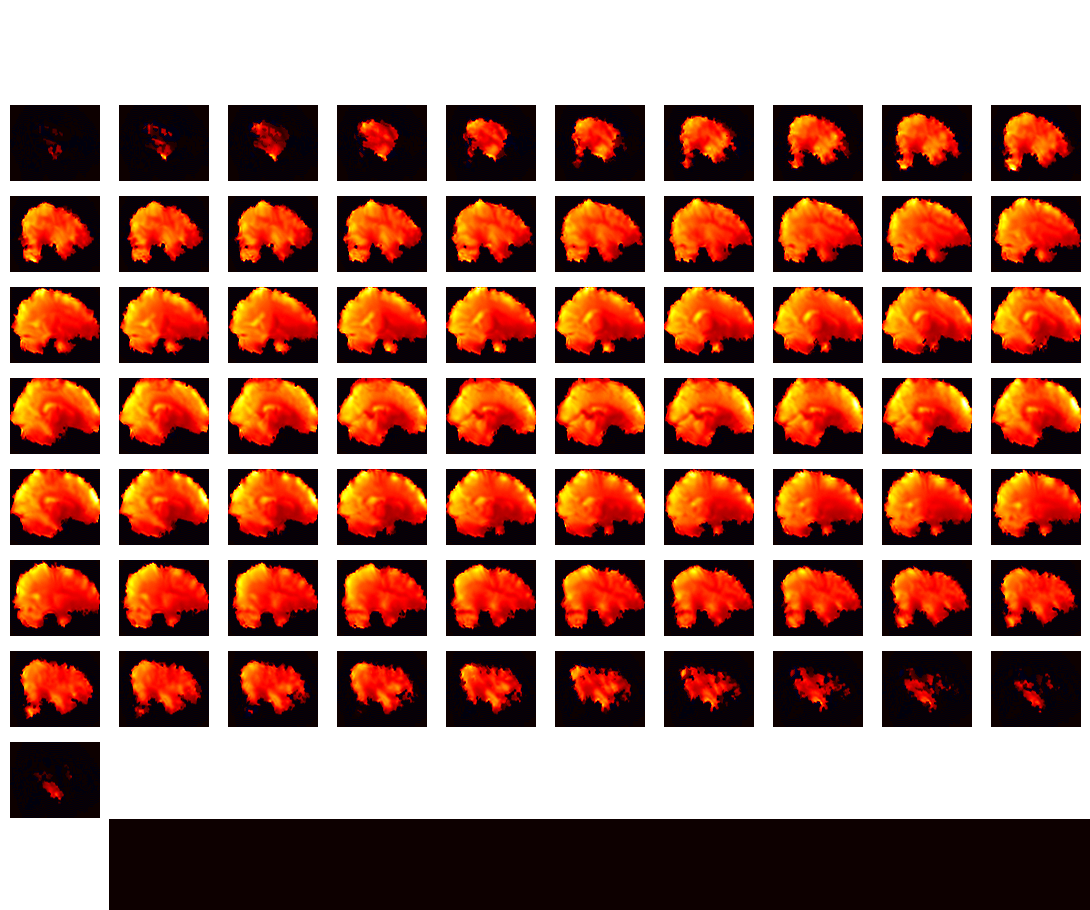

In [16]:
# to look at the mean fMRI brain image for a single participant
import matplotlib.pyplot as plt
from nilearn import image
from nilearn import plotting

# change this line to get your data!
mean_image = image.mean_img(fmri_img_single)
plotting.view_img(mean_image, threshold=None)

In [7]:
# import atlas with ROIs to be used for the connectivity analysis
# the MSDL (multi-subject dictionary learning; {cite}Varoquaux_2011) atlas defines a set of probabilistic ROIs across the brain.
# import a different atlas, if you prefer
import numpy as np
from nilearn import datasets

msdl_atlas = datasets.fetch_atlas_msdl()

msdl_coords = msdl_atlas.region_coords
n_regions = len(msdl_coords)

print(f'MSDL has {n_regions} ROIs, part of the following networks :\n{np.unique(msdl_atlas.networks)}.')

MSDL has 39 ROIs, part of the following networks :
[b'Ant IPS' b'Aud' b'Basal' b'Cereb' b'Cing-Ins' b'D Att' b'DMN'
 b'Dors PCC' b'L V Att' b'Language' b'Motor' b'Occ post' b'R V Att'
 b'Salience' b'Striate' b'Temporal' b'Vis Sec'].


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:2358: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


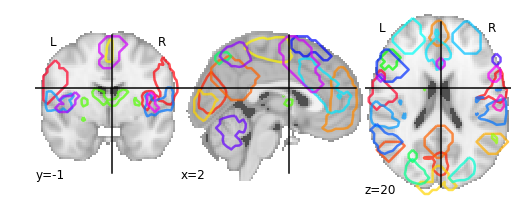

In [8]:
# view the atlas
plotting.plot_prob_atlas(msdl_atlas.maps)

In [9]:
# apply a NiftiMapsMasker as the MSDL atlas is probabilistic
# !! if you're using a deterministic atlas, then use a NiftiLabelsMasker object !!
from nilearn import input_data

masker = input_data.NiftiMapsMasker(
    msdl_atlas.maps, resampling_target="data",
    t_r=2, detrend=True,
    low_pass=0.1, high_pass=0.01).fit()

In [20]:
# calculate the connectivity matrices and the mean functional connectivity (mFC) values (across the brain) for all participants
from nilearn.connectome import ConnectivityMeasure
from numpy import mean

# initiate an empty list that will contain a single mFC value for each participant
mFC_list = []
# create a function that will execute the connectivity analysis and calculate mFC values
def calc_conn_mFC():
    # specify for the number of participants you have
    for n in range(len(fmri_img)):
        # !!!!!! change this line to get your data !!!!!!!
        # !! it is recommended to remove confounds by using the confounds= option and selecting them from your confounds file
        # it is also a good idea to compare the corrected and uncorrected connectivity matrices
        roi_time_series = masker.transform(fmri_img[n])
        # check shape
        print(roi_time_series.shape)
        # calculate a connectivity matrix
        # choose a type of correlation analysis, tangent space embedding is recommended, but it requires that the program is run on all subjects simultaneously
        correlation_measure = ConnectivityMeasure(kind='correlation')
        correlation_matrix = correlation_measure.fit_transform([roi_time_series])[0]
        # save the matrix to a csv file, using subject n
        # N.B. matrix file will not have column and row names, i.e. the brain region names. 
        # They have to be added from the atlas that was used for the connectivity analysis when doing the plotting, for instance
        np.savetxt('sub_'+str(n)+'_conn_matrix.csv', correlation_matrix, delimiter=',')
        # calculate mFC and append value to the mFC_list
        mFC = mean(correlation_matrix)
        mFC_list.append(mFC)


In [21]:
#run the FC function
calc_conn_mFC()

(192, 39)
(192, 39)
(192, 39)
(192, 39)
(192, 39)
(192, 39)
(192, 39)
(192, 39)
(192, 39)
(192, 39)
(192, 39)
(192, 39)
(192, 39)
(192, 39)
(192, 39)
(192, 39)
(192, 39)
(192, 39)


In [22]:
# save the mFC_list
mFC_list = np.array(mFC_list)
np.savetxt('mFC_list.csv', mFC_list, delimiter=',')

In [ ]:
# import specific correlation matrix csv files
# or the mFC_list file (especially after kernel restart)


In [23]:
# plot a connectivity matrix
# set this to a matrix of your choice
# correlation_matrix = 
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix, labels=msdl_atlas.labels,
                     vmax=0.8, vmin=-0.8, colorbar=True)

NameError: name 'correlation_matrix' is not defined

In [ ]:
# Or view it as an embedded connectome:
plotting.view_connectome(correlation_matrix, edge_threshold=0.2,
                         node_coords=msdl_atlas.region_coords)

In [ ]:
# read the framewise displacement (FD) values from your confounds file and calculate mean FD (mFD) values for each participant
import pandas as pd

# initiate an empty list that will contain a single mFD value for each participant
mFD_list = []
def calc_mFD():
    # specify for the number of participants you have
    for n in range(30):
        # change this line to get your data!
        confs_table = pd.read_table(development_dataset.confounds[n])
        FD = confs_table[['framewise_displacement']]
        # calculate mFD and append value to the mFD_list
        mFD = mean(FD)
        mFD_list.append(mFD)


In [ ]:
#run the mFD function
calc_mFD()

In [ ]:
# save the mFD_list
mFD_list = np.array(mFD_list)
np.savetxt('mFD_list.csv', mFD_list, delimiter=',')

In [ ]:
# import the mFC_list file (especially after kernel restart)


In [ ]:
#plot the 2 arrays
import matplotlib.pyplot as plot
plot.scatter(mFC_list, mFD_list)
plot.title('mFD-mFC Correlation')
plot.xlabel('mFC')
plot.ylabel('mFD')
plot.show()

In [ ]:
#transpose the mFD_list (if necessary) to able to perform correlation analysis between mFC and mFD
mFD_list=mFD_list.T
mFD_list

In [ ]:
# Perform a correlation analysis of the 2 arrays (mFC and mFD) and get a QC metric known as QC-FC
r = np.corrcoef(mFC_list, mFD_list)
r